In [1]:
from itertools import combinations
import pandas as pd
from random import random

In [2]:
df = pd.DataFrame()
df["id"] = range(1, 120 + 1)
df["value"] = df.apply(lambda x: random(), axis=1)

In [3]:
df = df.sort_values("value", ascending=False)
df["rank"] = range(1, 120 + 1)

In [4]:
def win_rate(df):
    dd = df.groupby(["option_source", "option_target"]).agg({"id": "count"}).reset_index()
    m = dd.pivot(index="option_source", columns="option_target", values="id").fillna(0)
    ids = set(df["option_source"]) | set(df["option_target"])
    m = m.reindex(ids)
    m = m.reindex(ids, axis=1)
    m = m.fillna(0)

    r = m + m.T
    win_rate = m.sum() / r.sum()

    r1 = pd.DataFrame(win_rate).reset_index().rename(columns={"option_target": "id", 0: "value"})
    r1 = r1.sort_values("value", ascending=False)
    r1["rank"] = range(1, r1.shape[0] + 1)

    return r1

In [5]:
df1 = pd.DataFrame(list(combinations(list(df["id"]), 2)), columns=["option_target", "option_source"])
df1["id"] = 1

In [6]:
r1 = win_rate(df1)
r1

,id,value,rank
78,79,1.000000,1
118,119,0.991597,2
116,117,0.983193,3
109,110,0.974790,4
22,23,0.966387,5
...,...,...,...
110,111,0.033613,116
90,91,0.025210,117
72,73,0.016807,118
40,41,0.008403,119


In [7]:
from scipy import stats

In [8]:
output = []
# int(120*119/2)
for it in range(100):
    for i in range(20, 2000):
        r2 = win_rate(df1.sample(i))
        r3 = pd.merge(r1, r2, on="id")
        tau, p_value = stats.kendalltau(r3["rank_x"], r3["rank_y"])
        output.append({"corr": tau, "pair": i, "iteration": it})

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='pair', ylabel='corr'>

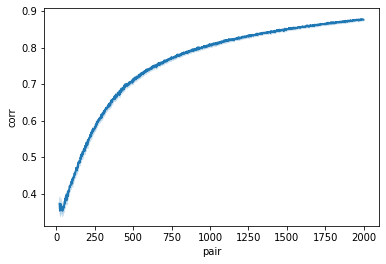

In [10]:
sns.lineplot(x="pair", y="corr", data=pd.DataFrame(output))